# Using a Neural Network with the Medical Insurance Data

This is a continuation of the medical insurance project using tensorflow_neural_net, which is a neural network code written using the Keras API in Tensorflow and contained in the python folder.

The first part of the notebook follows the same data pre-processing as in the medical_insurance_cost_prediction notebook, and so the details can be found there, along with results when applying a simple linear regression model.


### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from data_science_projects import tensorflow_neural_net as tfnn
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
sns.set_style('darkgrid')

### Load and pre-process the data

In [3]:
df = pd.read_csv('../../data/insurance.csv')

one_hots = ['sex', 'smoker', 'region']

df_onehot = df.copy()

for i in one_hots:
    df_onehot = pd.concat([df_onehot, pd.get_dummies(df_onehot[i], drop_first=True)], axis=1)
    
df_onehot.drop(columns=one_hots, inplace=True)
df_onehot.rename(columns={'yes': 'smoker'}, inplace=True)

cut_correlation = 0.1

corr = df_onehot.corr('pearson')
cut_df_onehot = df_onehot[corr['charges'][corr['charges'].abs()>cut_correlation].index]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cut_df_onehot.drop('charges', 1), cut_df_onehot['charges'], test_size = 0.15, random_state=10)

### Fitting models using tensorflow_neural_net

Now we have the same training and test data as used in the first part of medical_insurance_cost_prediction. There, we used a linear regression model; here, we try a simple neural network. The layer's and activations have been decided by trial and error. This set up gave the best performance on the test data from small set of configurations tried.

In [5]:
layer_dims = [2*X_train.shape[1], 1]
activations = ['relu', 'linear']

model = tfnn.L_layer_model(np.array(X_train),
                               np.array(y_train),
                               layer_dims,
                               activations,
                               seed=1,
                               learning_rate=0.1,
                               lambd = 0.0,
                               rel_tol=0.00001,
                               cost="mse",
                               optimizer='adam',
                               epochs=10000,
                               batch_size=32,
                               verbose=False)

In [6]:
y_pred_train = model.predict(np.array(X_train))
y_pred_test = model.predict(np.array(X_test))

RMSE = 4787.739404
RMSE = 5515.037165


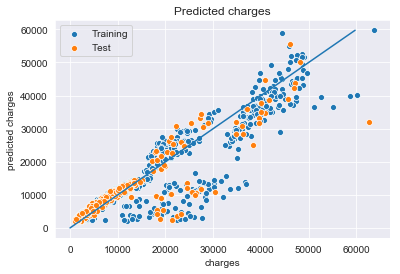

In [7]:
sns.scatterplot(y_train, y_pred_train[:,0])
sns.scatterplot(y_test, y_pred_test[:,0])
plt.ylabel('predicted charges')
plt.title('Predicted charges')
plt.legend(('Training', 'Test'))
maxim = np.max(np.concatenate([y_pred_train, y_pred_test]))
plt.plot([0,maxim], [0,maxim])

print('RMSE = %f' %mse(y_train, y_pred_train, squared=False))
print('RMSE = %f' %mse(y_test, y_pred_test, squared=False))


Here, we see that we have slightly reduced the RMSE, as compared to the case where we used the data with the linear regression model. From the RMSEs. it appears that we may be overfitting to the training data.

After trying various values of lambda, we do not see a large reduction in overfitting, as seen below for lambda = 100.

In [10]:
layer_dims = [2*X_train.shape[1], 1]
activations = ['relu', 'linear']

model = tfnn.L_layer_model(np.array(X_train),
                               np.array(y_train),
                               layer_dims,
                               activations,
                               seed=1,
                               learning_rate=0.1,
                               lambd = 100.0,
                               rel_tol=0.00001,
                               cost="mse",
                               optimizer='adam',
                               epochs=10000,
                               batch_size=32,
                               verbose=False)

In [11]:
y_pred_train = model.predict(np.array(X_train))
y_pred_test = model.predict(np.array(X_test))

RMSE = 5012.633760
RMSE = 5669.412408


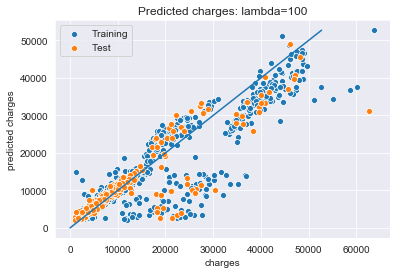

In [12]:
sns.scatterplot(y_train, y_pred_train[:,0])
sns.scatterplot(y_test, y_pred_test[:,0])
plt.ylabel('predicted charges')
plt.title('Predicted charges: lambda=100')
plt.legend(('Training', 'Test'))
maxim = np.max(np.concatenate([y_pred_train, y_pred_test]))
plt.plot([0,maxim], [0,maxim])

print('RMSE = %f' %mse(y_train, y_pred_train, squared=False))
print('RMSE = %f' %mse(y_test, y_pred_test, squared=False))

Let's now look at the impact of rescaling the data.

In [18]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

mean_age = X_train['age'].mean()
mean_bmi = X_train['bmi'].mean()
std_age = X_train['age'].std()
std_bmi = X_train['bmi'].std()

X_train_scale['age'] = (X_train['age'] - mean_age) / std_age
X_train_scale['bmi'] = (X_train['bmi'] - mean_bmi) / std_bmi
X_train_scale['smoker'] = X_train['smoker'].replace({0:-1})

# I will do the same for the test data while the means and stds are here.
X_test_scale['age'] = (X_test['age'] - mean_age) / std_age
X_test_scale['bmi'] = (X_test['bmi'] - mean_bmi) / std_bmi
X_test_scale['smoker'] = X_test['smoker'].replace({0:-1})

In [19]:
layer_dims = [2*X_train_scale.shape[1], 1]
activations = ['relu', 'linear']

model = tfnn.L_layer_model(np.array(X_train_scale),
                               np.array(y_train),
                               layer_dims,
                               activations,
                               seed=1,
                               learning_rate=0.1,
                               lambd = 0.0,
                               rel_tol=0.00001,
                               cost="mse",
                               optimizer='adam',
                               epochs=10000,
                               batch_size=32,
                               verbose=False)

In [20]:
y_pred_train = model.predict(np.array(X_train_scale))
y_pred_test = model.predict(np.array(X_test_scale))

RMSE = 4772.734843
RMSE = 5474.176541


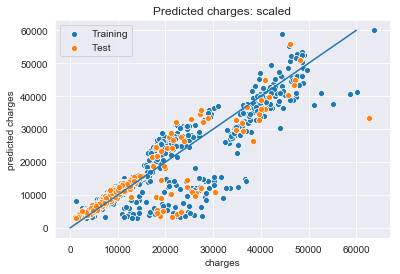

In [21]:
sns.scatterplot(y_train, y_pred_train[:,0])
sns.scatterplot(y_test, y_pred_test[:,0])
plt.ylabel('predicted charges')
plt.title('Predicted charges: scaled')
plt.legend(('Training', 'Test'))
maxim = np.max(np.concatenate([y_pred_train, y_pred_test]))
plt.plot([0,maxim], [0,maxim])

print('RMSE = %f' %mse(y_train, y_pred_train, squared=False))
print('RMSE = %f' %mse(y_test, y_pred_test, squared=False))

Again there is not much difference in the RMSE. Finally, for this section, I will look at using lambda = 100 with the rescaled data.

In [22]:
model = tfnn.L_layer_model(np.array(X_train_scale),
                               np.array(y_train),
                               layer_dims,
                               activations,
                               seed=1,
                               learning_rate=0.1,
                               lambd = 100.0,
                               rel_tol=0.00001,
                               cost="mse",
                               optimizer='adam',
                               epochs=10000,
                               batch_size=32,
                               verbose=False)

In [23]:
y_pred_train = model.predict(np.array(X_train_scale))
y_pred_test = model.predict(np.array(X_test_scale))

RMSE = 4788.701180
RMSE = 5480.263056


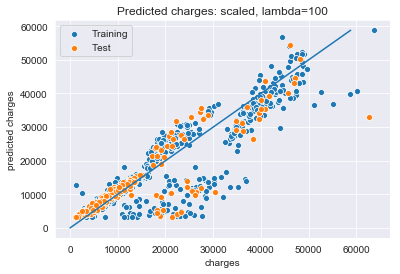

In [24]:
sns.scatterplot(y_train, y_pred_train[:,0])
sns.scatterplot(y_test, y_pred_test[:,0])
plt.ylabel('predicted charges')
plt.title('Predicted charges: scaled, lambda=100')
plt.legend(('Training', 'Test'))
maxim = np.max(np.concatenate([y_pred_train, y_pred_test]))
plt.plot([0,maxim], [0,maxim])

print('RMSE = %f' %mse(y_train, y_pred_train, squared=False))
print('RMSE = %f' %mse(y_test, y_pred_test, squared=False))

No real difference. It may be that we need more data to reduce the overfitting.

Let's look at splitting the smoker and non-smoker data up, as we did in medical_insurance_cost_prediction notebook but using the scaled data.

In [25]:
X_train_nonsmoke = X_train_scale[X_train['smoker']==0].drop(columns=['smoker'])
X_test_nonsmoke = X_test_scale[X_test['smoker']==0].drop(columns=['smoker'])

y_train_nonsmoke = y_train[X_train['smoker']==0].drop(columns=['smoker'])
y_test_nonsmoke = y_test[X_test['smoker']==0].drop(columns=['smoker'])

X_train_smoke = X_train_scale[X_train['smoker']==1].drop(columns=['smoker'])
X_test_smoke = X_test_scale[X_test['smoker']==1].drop(columns=['smoker'])

y_train_smoke = y_train[X_train['smoker']==1].drop(columns=['smoker'])
y_test_smoke = y_test[X_test['smoker']==1].drop(columns=['smoker'])

In [26]:
model_nonsmoke = tfnn.L_layer_model(np.array(X_train_nonsmoke),
                               np.array(y_train_nonsmoke),
                               layer_dims,
                               activations,
                               seed=1,
                               learning_rate=0.1,
                               lambd = 0.0,
                               rel_tol=0.00001,
                               cost="mse",
                               optimizer='adam',
                               epochs=10000,
                               batch_size=32,
                               verbose=False)

In [27]:
model_smoke = tfnn.L_layer_model(np.array(X_train_smoke),
                               np.array(y_train_smoke),
                               layer_dims,
                               activations,
                               seed=1,
                               learning_rate=0.1,
                               lambd = 0.0,
                               rel_tol=0.00001,
                               cost="mse",
                               optimizer='adam',
                               epochs=10000,
                               batch_size=32,
                               verbose=False)

In [28]:
y_pred_train_nonsmoke = model_nonsmoke.predict(np.array(X_train_nonsmoke))
y_pred_test_nonsmoke = model_nonsmoke.predict(np.array(X_test_nonsmoke))

y_pred_train_smoke = model_smoke.predict(np.array(X_train_smoke))
y_pred_test_smoke = model_smoke.predict(np.array(X_test_smoke))

RMSE = 4572.435804
RMSE = 5009.178684


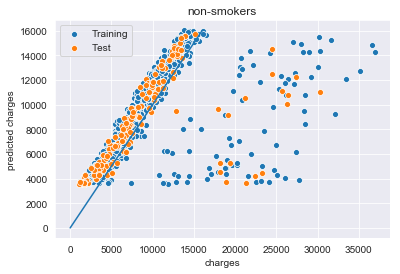

In [29]:
sns.scatterplot(y_train_nonsmoke, y_pred_train_nonsmoke[:,0])
sns.scatterplot(y_test_nonsmoke, y_pred_test_nonsmoke[:,0])
plt.ylabel('predicted charges')
plt.title('non-smokers')
plt.legend(('Training', 'Test'))
maxim = np.max(np.concatenate([y_pred_train_nonsmoke, y_pred_test_nonsmoke]))
plt.plot([0,maxim], [0,maxim])

print('RMSE = %f' %mse(y_train_nonsmoke, y_pred_train_nonsmoke, squared=False))
print('RMSE = %f' %mse(y_test_nonsmoke, y_pred_test_nonsmoke, squared=False))

RMSE = 5351.704314
RMSE = 6901.273803


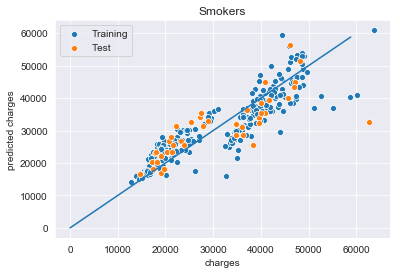

In [31]:
sns.scatterplot(y_train_smoke, y_pred_train_smoke[:,0])
sns.scatterplot(y_test_smoke, y_pred_test_smoke[:,0])
plt.ylabel('predicted charges')
plt.title('Smokers')
plt.legend(('Training', 'Test'))
maxim = np.max(np.concatenate([y_pred_train, y_pred_test]))
plt.plot([0,maxim], [0,maxim])

print('RMSE = %f' %mse(y_train_smoke, y_pred_train_smoke, squared=False))
print('RMSE = %f' %mse(y_test_smoke, y_pred_test_smoke, squared=False))

Both of these models seem to perform with an accuracy comparable to that of the linear regression method.

For the non-smoker case, we perform as well as the polynomial degree = 2 model.

As with the linear regression case, we could now cut out the outliers in the training data to model for the main group seen for non-smoking case. However, that extension to the model was covered in medical_insurance_cost_prediction and will not be repeated here.

### Conclusion

We have used a simple neural network on the medical insurance data. We found that when fitting for the smoker + non-smoker data together we cound slightly reduce the RMSE as compared with the linear regression model previously used.

However, the data appears to naturally split into smoker and non-smoker, and with this split, there was no real gain from using the neural network. This may be due to the small amount of training data. It could also be due to the randomness in the data not being easily modeled.